# Codes

In [9]:
import numpy as np


class Simplex(object):
    def __init__(self, obj, b_matrix=[], maxloop=1000, max_mode=False):
        self.mat, self.max_mode = np.array(
            [[0] + obj]) * (-1 if max_mode else 1), max_mode
        if b_matrix != []:
            self.mat = np.vstack([self.mat, b_matrix])
        self.count = 0
        self.maxloop = maxloop
        self.log = []

    def _pivot(self, mat, B, row, col):
        mat[row] /= mat[row][col]
        ids = np.arange(mat.shape[0]) != row
        # for each i!= row do: mat[i]= mat[i] - mat[row] * mat[i][col]
        mat[ids] -= mat[row] * mat[ids, col:col + 1]
        B[row] = col
        self.count += 1
        self.log.append(mat[0][0])
        # print(self.count)

    def _simplex(self, mat, B, m, n):
        while mat[0, 1:].min() < 0 and self.count < self.maxloop:
            # use Bland's method to avoid degeneracy
            # col = np.where(mat[0, 1:] < 0)[0][0] + 1
            # use normal simplex, may encounter degeneracy
            col = mat[0, 1:].argmin() + 1
            row = np.array([mat[i][0] / mat[i][col] if mat[i][col] > 0 else 0x7fffffff for i in
                            range(1, mat.shape[0])]).argmin() + 1  # find the theta index
            if mat[row][col] <= 0:
                return None  # the theta is ∞, the problem is unbounded
            self._pivot(mat, B, row, col)
        print('loop:', self.count)
        return mat[0][0] * (1 if self.max_mode else -1), {B[i]: mat[i, 0] for i in range(1, m) if B[i] < n}

    def solve(self):
        m, n = self.mat.shape  # m - 1 is the number slack variables we should add
        temp, B = np.vstack([np.zeros((1, m - 1)), np.eye(m - 1)]
                            ), list(range(n - 1, n + m - 1))  # add diagonal array
        mat = self.mat = np.hstack([self.mat, temp])  # combine them!
        if mat[1:, 0].min() < 0:  # is the initial basic solution feasible?
            row = mat[1:, 0].argmin() + 1  # find the index of min b
            # set first row value to zero, and store the previous value
            temp, mat[0] = np.copy(mat[0]), 0
            mat = np.hstack(
                [mat, np.array([1] + [-1] * (m - 1)).reshape((-1, 1))])
            self._pivot(mat, B, row, mat.shape[1] - 1)
            if self._simplex(mat, B, m, n)[0] != 0:
                return None  # the problem has no answer
            if mat.shape[1] - 1 in B:  # if the x0 in B, we should pivot it.
                self._pivot(mat, B, B.index(
                    mat.shape[1] - 1), np.where(mat[0, 1:] != 0)[0][0] + 1)
            # recover the first line
            self.mat = np.vstack([temp, mat[1:, :-1]])
            for i, x in enumerate(B[1:]):
                self.mat[0] -= self.mat[0, x] * self.mat[i + 1]
        return self._simplex(self.mat, B, m, n), self.log

# Test: easy

In [2]:
mt_b = [[2,1,2],[2,2,1]]
t = Simplex([-1, -2], mt_b)
print(t.solve())
print(t.mat)

loop: 1
(-2.0, {2: 1.0})
[[ 2.   0.   0.   1.   0. ]
 [ 1.   0.5  1.   0.5  0. ]
 [ 1.   1.5  0.  -0.5  1. ]]


# Test: harder

In [12]:
%%time
data = np.loadtxt("data_b.txt", dtype=int)
Z = list(data[0][1:])
b = list(data[1:])
test = Simplex(Z, b)
aasd, log = test.solve()
print(log)
# print(test.solve())
# print(test.mat)

loop: 92
[0.0, 0.0, 1017813.0, 1017813.0, 1392000.0, 1752800.0, 2142800.0, 2542400.0, 2542400.0, 2992520.0, 7255592.0, 7255592.0, 7255592.0, 8050760.0, 8248760.0, 8384192.0, 8384192.0, 8384192.0, 10126392.0, 10746392.0, 10746392.0, 10746392.0, 15270122.0, 15270122.0, 22060682.0, 23014521.0, 23278682.0, 23684682.0, 24549518.0, 25669406.0, 27436682.0, 30636662.0, 32259654.0, 33166742.0, 34721358.0, 35057358.0, 35088219.0, 40424688.0, 43908688.0, 47258688.0, 47287263.0, 52699013.0, 52699013.0, 52699013.0, 53089013.0, 53198463.0, 53324948.0, 53324948.0, 53475013.0, 53771013.0, 53771013.0, 53771013.0, 54520938.0, 54670923.0, 54671013.0, 54820908.0, 55061013.0, 55061013.0, 55061013.0, 56796645.0, 58597997.0, 59867413.0, 60104213.0, 60390613.0, 60702613.0, 61014613.0, 61326613.0, 61626058.0, 63676210.0, 65730610.0, 67446610.0, 69174610.0, 69174610.0, 69174610.0, 69380221.0, 73348207.0, 74722831.0, 74722831.0, 76419607.0, 80082007.0, 83570404.0, 87598798.0, 87598798.0, 87598798.0, 87953011.0, 

In [17]:
%%time
data = np.loadtxt("data_b.txt", dtype=int)
Z = list(data[0][1:])
B = list(data[1:])
test = Simplex(Z, B)
ptsd, log = test.solve()
# print(test.mat)
# print(mat)

import matplotlib.pyplot as plt
plt.plot(log)
print(log[-1])

loop: 92
Wall time: 730 ms


loop: 91
loop: 375
1469483.3751484097
Wall time: 233 ms


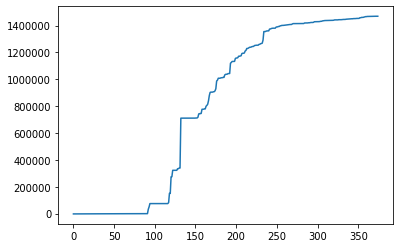

In [19]:
%%time
data = np.loadtxt("data_isreal.txt", dtype=int)
Z = list(data[0][1:])
B = list(data[1:])
test = Simplex(Z, B)
ptsd, log = test.solve()
# print(test.mat)
# print(mat)

import matplotlib.pyplot as plt
plt.plot(log)
print(log[-1])